# Welcome to the pitch predicting model. Part 1 of the notebook trains and tests the model. Part 2 is where the model can be run with new datasets. If you want to test the model with your own dataset, do so in Part 2. 

### Part 1 - Creating, training, and testing the model

In [318]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm, datasets
from pprint import pprint

%matplotlib inline

In [319]:
# Import Verlander dataset 

verlander_df = pd.read_csv(Path("/Users/jakewheeler/Fintech/Challenges/Jake/verlander_update.csv"),
                
                            parse_dates=True,
                            infer_datetime_format=True)

display(verlander_df.head())

,pitch_type,game_date,player_name,batter,pitcher,events,description,zone,des,stand,...,on_1b,outs_when_up,inning,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,9/16/2022,"Verlander, Justin",669127,434378,strikeout,swinging_strike,9,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,5,Slider,0,2,Infield shift,Standard
1,FF,9/16/2022,"Verlander, Justin",669127,434378,NaN,foul,3,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,4,4-Seam Fastball,0,2,Infield shift,Standard
2,SL,9/16/2022,"Verlander, Justin",669127,434378,NaN,called_strike,13,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,3,Slider,0,2,Infield shift,Standard
3,FF,9/16/2022,"Verlander, Justin",669127,434378,NaN,foul,1,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,2,4-Seam Fastball,0,2,Infield shift,Standard
4,SL,9/16/2022,"Verlander, Justin",669127,434378,NaN,ball,8,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,1,Slider,0,2,Infield shift,Standard


In [320]:
# Clean dataset 


#Selecting desired parameters 
verlander_df = verlander_df[[
    'pitch_type',
    'stand', 
    'balls', 
    'strikes', 
    'on_3b', 
    'on_2b', 
    'on_1b', 
    'outs_when_up', 
    'inning', 
    'pitch_number', 
    'bat_score', 
    'fld_score', 
    'if_fielding_alignment', 
    'of_fielding_alignment',
    #'zone',
    #'events',
    ]]

#If adding in extra parameters, remember to add them to this section in part 2 as well.
														
#Uncomment if adding zone. Remember to uncomment zone from the list above
# display(verlander_df.tail(20))
# verlander_df['zone'] = verlander_df['zone'].shift(-1)
# verlander_df = verlander_df[:-1]
# verlander_df['zone'] = verlander_df['zone'].map({1:'A', 2:'B',3:'C', 4:'D',5:'E', 6:'F',7:'G', 8:'H',9:'I', 10:'J',11:'K', 12:'L',13:'M', 14:'N'}) 

#Uncomment if adding previous pitch
# verlander_df['previous_pitch']= verlander_df['pitch_type'].shift(-1)

#Uncomment if adding events. Remember to uncomment events from the list above
# verlander_df['events'] = verlander_df['events'].fillna('No Major Event')

# Uncomment if using Pitch count
# verlander_df['ones'] = 1
# verlander_df[['game_date', 'ones']]
# verlander_df['pitch_count'] = verlander_df.groupby(['game_date']).cumcount(ascending = False)
# verlander_df['pitch_count'] = verlander_df['pitch_count'] + 1

# Uncoment if using score differential
# verlander_df['score_diff'] = verlander_df['fld_score'] - verlander_df['bat_score']
# verlander_df = verlander_df.drop(columns=['game_date'])


display(verlander_df.tail(20))


,pitch_type,stand,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
2316,FF,R,0,1,NaN,NaN,NaN,0,2,2,1,0,Standard,Standard
2317,SL,R,0,0,NaN,NaN,NaN,0,2,1,1,0,Standard,Standard
2318,FF,L,0,0,NaN,NaN,NaN,0,2,1,0,0,Infield shift,Standard
2319,FF,R,3,2,NaN,NaN,NaN,2,1,7,0,0,Standard,Standard
2320,FF,R,3,2,NaN,NaN,NaN,2,1,6,0,0,Standard,Standard
2321,CU,R,2,2,NaN,NaN,NaN,2,1,5,0,0,Standard,Standard
2322,SL,R,2,1,NaN,NaN,NaN,2,1,4,0,0,Standard,Standard
2323,SL,R,1,1,NaN,NaN,NaN,2,1,3,0,0,Standard,Standard
2324,SL,R,0,1,NaN,NaN,NaN,2,1,2,0,0,Standard,Standard
2325,FF,R,0,0,NaN,NaN,NaN,2,1,1,0,0,Standard,Standard


In [321]:
#This code changes baserunner values to 0 for no runner and 1 for runner from NaN and baserunner number

#Changing NaN values to 0 for baserunner count
verlander_df['on_3b'] = verlander_df['on_3b'].fillna(0)
verlander_df['on_2b'] = verlander_df['on_2b'].fillna(0)
verlander_df['on_1b'] = verlander_df['on_1b'].fillna(0)
verlander_df.head()

#Changing baserunner numbers to 1
verlander_df['on_3b'][verlander_df['on_3b'] > 0.0] = 1.0
verlander_df['on_2b'][verlander_df['on_2b'] > 0.0] = 1.0
verlander_df['on_1b'][verlander_df['on_1b'] > 0.0] = 1.0


/var/folders/53/clylk17j4tv8jcsq7r8_z4b00000gn/T/ipykernel_82020/2358995832.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verlander_df['on_3b'][verlander_df['on_3b'] > 0.0] = 1.0
/var/folders/53/clylk17j4tv8jcsq7r8_z4b00000gn/T/ipykernel_82020/2358995832.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verlander_df['on_2b'][verlander_df['on_2b'] > 0.0] = 1.0
/var/folders/53/clylk17j4tv8jcsq7r8_z4b00000gn/T/ipykernel_82020/2358995832.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [322]:
# Split into X and y 

X = verlander_df.drop(columns='pitch_type')

#Uncomment if using feature reduction
#X = verlander_df[['fld_score', 'pitch_number', 'outs_when_up', 'bat_score', 'balls', 'on_1b','strikes', 'inning' ]]
#X = verlander_df[['fld_score', 'pitch_number', 'outs_when_up','inning' ]]
#X = verlander_df[['fld_score', 'pitch_number', 'outs_when_up','inning', 'zone']]
#X = verlander_df[['balls', 'outs_when_up', 'fld_score', 'pitch_number', 'strikes','inning', 'score_diff']]

y= verlander_df['pitch_type']



In [323]:
# Use get_dummies to encode categorical variables 

X = pd.get_dummies(X)


display(X.head())

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,bat_score,fld_score,stand_L,stand_R,if_fielding_alignment_Infield shift,if_fielding_alignment_Standard,if_fielding_alignment_Strategic,of_fielding_alignment_Standard,of_fielding_alignment_Strategic
0,1,2,0.0,0.0,0.0,2,5,5,0,2,0,1,1,0,0,1,0
1,1,2,0.0,0.0,0.0,2,5,4,0,2,0,1,1,0,0,1,0
2,1,1,0.0,0.0,0.0,2,5,3,0,2,0,1,1,0,0,1,0
3,1,0,0.0,0.0,0.0,2,5,2,0,2,0,1,1,0,0,1,0
4,0,0,0.0,0.0,0.0,2,5,1,0,2,0,1,1,0,0,1,0


In [324]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [325]:
#Scaling the data
Scaler = StandardScaler()
X_scaler = Scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [326]:
# Creating the model
rf = RandomForestClassifier(n_estimators = 1000, min_samples_leaf= 4, random_state = 1)

#Fiitting the model 
rf.fit(X_train_scaled, y_train);

#Predictions
predictions = rf.predict(X_test_scaled)

In [327]:
#Parameters that are able to be adjusted
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [328]:
#Creating a second model with different parameters
rf_cu = RandomForestClassifier(n_estimators = 5000, random_state = 1)

#Fitting the model
rf_cu.fit(X_train_scaled, y_train);

#Predictions
predictions_cu = rf_cu.predict(X_test_scaled)

In [329]:
print('predictions from RF model 1')
print(classification_report(y_test, predictions))

predictions from RF model 1
              precision    recall  f1-score   support

          CH       0.00      0.00      0.00         8
          CU       0.50      0.07      0.13       120
          FF       0.55      0.83      0.66       292
          SL       0.45      0.35      0.39       164

    accuracy                           0.53       584
   macro avg       0.37      0.31      0.30       584
weighted avg       0.50      0.53      0.47       584



/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [330]:
print('predictions from RF model 2')
print(classification_report(y_test, predictions_cu))

predictions from RF model 2
              precision    recall  f1-score   support

          CH       0.00      0.00      0.00         8
          CU       0.44      0.23      0.30       120
          FF       0.56      0.71      0.63       292
          SL       0.41      0.37      0.38       164

    accuracy                           0.51       584
   macro avg       0.35      0.33      0.33       584
weighted avg       0.49      0.51      0.48       584



In [331]:

'''I am creating a model combining results from both models. 
The reason for combining two models is that model 1 has a higher accuracy and f1 score for FF/SL than model 2, but model 2 has a much higher f1 score for CU. 
The idea is to combine the CU from model 2 and the FF/SL from model 1. The columns have been named after what the model is better at predicting '''

#Creating a dataframe with predictions from both models
predictions_df_2model = pd.DataFrame(predictions)
predictions_df_2model['CU'] = predictions_cu
predictions_df_2model = predictions_df_2model.rename(columns = {0: 'FF/SL'})
predictions_df_2model




,FF/SL,CU
0,SL,SL
1,SL,FF
2,FF,CU
3,FF,FF
4,FF,FF
...,...,...
579,FF,FF
580,FF,FF
581,SL,SL
582,FF,FF


In [332]:
#This function returns the CU predictions from model 2 and all other results are from model 1
def categorise(row):  
    if row['CU'] == 'CU' and row['FF/SL'] != 'CU':
        return row['CU']
    else:
        return row['FF/SL']

#Creating the combined predictions row
predictions_df_2model['Combined'] = predictions_df_2model.apply(lambda row: categorise(row), axis=1)
predictions_df_2model

,FF/SL,CU,Combined
0,SL,SL,SL
1,SL,FF,SL
2,FF,CU,CU
3,FF,FF,FF
4,FF,FF,FF
...,...,...,...
579,FF,FF,FF
580,FF,FF,FF
581,SL,SL,SL
582,FF,FF,FF


In [333]:
#Turning the combined predictions dataframe column to an array
predictions_combo=predictions_df_2model['Combined'].to_numpy()

#Printing classification report
print('Predictions from RF combined model')
print(classification_report(y_test, predictions_combo))

Predictions from RF combined model
              precision    recall  f1-score   support

          CH       0.00      0.00      0.00         8
          CU       0.44      0.23      0.30       120
          FF       0.56      0.78      0.65       292
          SL       0.46      0.32      0.38       164

    accuracy                           0.53       584
   macro avg       0.36      0.33      0.33       584
weighted avg       0.50      0.53      0.49       584



/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [334]:
#Feature importance of model 1
feature_importance = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importance



inning                                 0.166351
fld_score                              0.124556
pitch_number                           0.114317
strikes                                0.106068
outs_when_up                           0.100014
balls                                  0.095721
bat_score                              0.062189
on_1b                                  0.052522
if_fielding_alignment_Infield shift    0.033503
if_fielding_alignment_Standard         0.030620
stand_R                                0.030258
stand_L                                0.030108
on_2b                                  0.025139
on_3b                                  0.016111
of_fielding_alignment_Strategic        0.005996
of_fielding_alignment_Standard         0.005391
if_fielding_alignment_Strategic        0.001138
dtype: float64

<AxesSubplot:title={'center':'Feature Importance'}>

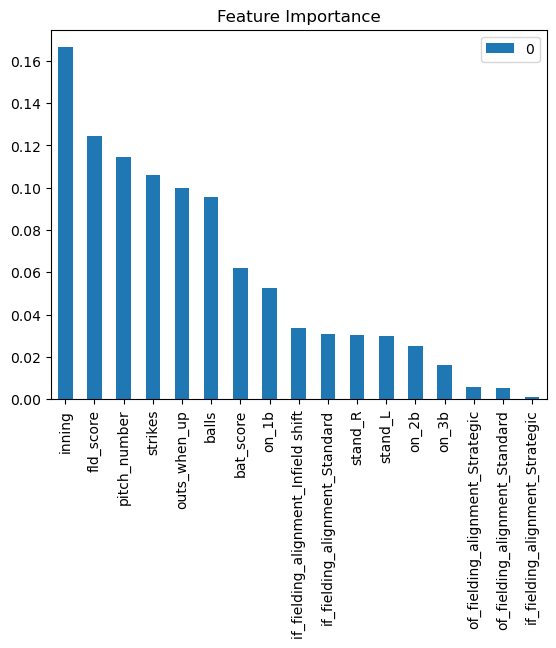

In [335]:
#plotting feature importance from model 1. 
feature_importance_df = pd.DataFrame(feature_importance)
feature_importance_df.plot(kind='bar', title = 'Feature Importance')

In [336]:
#Creating four multiclass SVM models

linear = svm.SVC(kernel='linear', decision_function_shape='ovo', random_state = 1)

rbf = svm.SVC(kernel='rbf', decision_function_shape='ovo', random_state = 1)

poly = svm.SVC(kernel='poly', degree=4, decision_function_shape='ovo', C= 1, gamma = 'scale', random_state = 1)

sigmoid = svm.SVC(kernel='sigmoid', decision_function_shape='ovo', random_state = 1)


In [337]:
#Fitting the models

linear.fit(X_train, y_train)

rbf.fit(X_train, y_train)

poly.fit(X_train, y_train)

sigmoid.fit(X_train, y_train)


SVC(decision_function_shape='ovo', kernel='sigmoid', random_state=1)

In [338]:
#Predictions from the models

linear_predictions = linear.predict(X_test)
rbf_predictions = rbf.predict(X_test)
poly_predictions = poly.predict(X_test)
sigmoid_predictions = sigmoid.predict(X_test)

In [339]:
#Classification reports for the models

print('Linear SVM Classification Report')
print(classification_report(y_test, linear_predictions))

print('RBF SVM Classification Report')
print(classification_report(y_test, rbf_predictions))

print('Poly SVM Classification Report')
print(classification_report(y_test, poly_predictions))

print('Sigmoid SVM Classification Report')
print(classification_report(y_test, sigmoid_predictions))


Linear SVM Classification Report
              precision    recall  f1-score   support

          CH       0.00      0.00      0.00         8
          CU       0.00      0.00      0.00       120
          FF       0.50      1.00      0.67       292
          SL       0.00      0.00      0.00       164

    accuracy                           0.50       584
   macro avg       0.12      0.25      0.17       584
weighted avg       0.25      0.50      0.33       584

RBF SVM Classification Report
              precision    recall  f1-score   support

          CH       0.00      0.00      0.00         8
          CU       0.00      0.00      0.00       120
          FF       0.52      0.90      0.66       292
          SL       0.47      0.23      0.31       164

    accuracy                           0.52       584
   macro avg       0.25      0.28      0.24       584
weighted avg       0.39      0.52      0.42       584

Poly SVM Classification Report
              precision    recall  f

/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Part 2. This section can be used to test the model with new datasets. Change the path location in the cell below to the new dataset to try it out!

This section is the field test with the data from Verlander's September 28th, 2022 game

In [340]:
# Import field test dataset 

field_test_df = pd.read_csv(Path("/Users/jakewheeler/Fintech/Challenges/Jake/field_test_data.csv"),
                
                            parse_dates=True,
                            infer_datetime_format=True)

display(field_test_df.head())

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2022-09-28,97.1,-1.50,7.01,"Verlander, Justin",656976,434378,strikeout,swinging_strike,...,2,2,2,2,2,Infield shift,Standard,208,0.099,-0.403
1,FF,2022-09-28,96.7,-1.45,7.04,"Verlander, Justin",656976,434378,NaN,swinging_strike,...,2,2,2,2,2,Infield shift,Standard,210,-0.012,-0.116
2,SL,2022-09-28,88.4,-1.73,6.97,"Verlander, Justin",656976,434378,NaN,ball,...,2,2,2,2,2,Infield shift,Standard,166,0.000,0.052
3,SL,2022-09-28,89.8,-1.67,7.02,"Verlander, Justin",656976,434378,NaN,foul,...,2,2,2,2,2,Infield shift,Standard,172,0.000,-0.075
4,CU,2022-09-28,82.3,-1.69,6.93,"Verlander, Justin",662139,434378,field_out,hit_into_play,...,2,2,2,2,2,Infield shift,Standard,41,0.115,-0.074


In [341]:
# Clean dataset 

#Selecting desired parameters 
field_test_df = field_test_df[[
    'pitch_type',
    'stand', 
    'balls', 
    'strikes', 
    'on_3b', 
    'on_2b', 
    'on_1b', 
    'outs_when_up', 
    'inning', 
    'pitch_number', 
    'bat_score', 
    'fld_score', 
    'if_fielding_alignment', 
    'of_fielding_alignment',
    #'zone',
    #'events',
    ]]								

display(field_test_df.tail(20))

,pitch_type,stand,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
81,SL,L,3,1,NaN,664983.0,NaN,2,1,5,2,0,Standard,Standard
82,FF,L,3,0,NaN,664983.0,NaN,2,1,4,2,0,Standard,Standard
83,SL,L,2,0,NaN,NaN,664983.0,2,1,3,2,0,Infield shift,Standard
84,CU,L,1,0,NaN,NaN,664983.0,2,1,2,2,0,Infield shift,Standard
85,CU,L,0,0,NaN,NaN,664983.0,2,1,1,2,0,Infield shift,Standard
86,SL,L,0,1,NaN,NaN,664983.0,1,1,2,2,0,Infield shift,Standard
87,FF,L,0,0,NaN,NaN,664983.0,1,1,1,2,0,Infield shift,Standard
88,SL,R,0,0,656976.0,NaN,664983.0,0,1,1,1,0,Infield shift,Standard
89,FF,L,1,0,NaN,656976.0,NaN,0,1,2,1,0,Standard,Standard
90,FF,L,0,0,662139.0,NaN,656976.0,0,1,1,0,0,Standard,Standard


In [342]:
#This code changes baserunner values to 0 for no runner and 1 for runner from NaN and baserunner number

#Changing NaN values to 0 for baserunner count
field_test_df['on_3b'] = field_test_df['on_3b'].fillna(0)
field_test_df['on_2b'] = field_test_df['on_2b'].fillna(0)
field_test_df['on_1b'] = field_test_df['on_1b'].fillna(0)
field_test_df.head()

#Changing baserunner numbers to 1
field_test_df['on_3b'][field_test_df['on_3b'] > 0.0] = 1.0
field_test_df['on_2b'][field_test_df['on_2b'] > 0.0] = 1.0
field_test_df['on_1b'][field_test_df['on_1b'] > 0.0] = 1.0


/var/folders/53/clylk17j4tv8jcsq7r8_z4b00000gn/T/ipykernel_82020/3055114600.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_test_df['on_3b'][field_test_df['on_3b'] > 0.0] = 1.0
/var/folders/53/clylk17j4tv8jcsq7r8_z4b00000gn/T/ipykernel_82020/3055114600.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_test_df['on_2b'][field_test_df['on_2b'] > 0.0] = 1.0
/var/folders/53/clylk17j4tv8jcsq7r8_z4b00000gn/T/ipykernel_82020/3055114600.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [343]:
# Split into X and y 
X_ft = field_test_df.drop(columns='pitch_type')
y_ft= field_test_df['pitch_type']

# Use get_dummies to encode categorical variables 
X_ft = pd.get_dummies(X_ft)


In [344]:
#Scaling the data
Scaler = StandardScaler()
X_scaler = Scaler.fit(X_ft)
X_ft_scaled = X_scaler.transform(X_ft)


In [345]:
'''This is to ensure this dataframe has all the same variables as the test/train dataframe. 
# It is necessary because, for example, if there were no left handed hitters in the "stand" column then no "stand_L" column would be created by get.Dummies().
This would create an error because the dataframe would have less columns than the one the model was trained on.
This function creates empty columns for values that did not get created in this dataframe by get.Dummies()'''

parameters_list = {
    'stand_L',
    'stand_R',
    'if_fielding_alignment_Infield shift',
    'if_fielding_alignment_Standard',
    'if_fielding_alignment_Strategic',
    'of_fielding_alignment_Standard',
    'of_fielding_alignment_Strategic',
}

for string in parameters_list:
    if string not in X_ft:
        X_ft[string] = 0
	 				

In [346]:

#Predictions
predictions_ft = rf.predict(X_ft)

print('predictions from RF model 1')
print(classification_report(y_ft, predictions_ft))

predictions from RF model 1
              precision    recall  f1-score   support

          CH       0.00      0.00      0.00         2
          CU       0.00      0.00      0.00        21
          FF       0.48      0.94      0.63        49
          SL       0.20      0.03      0.06        29

    accuracy                           0.47       101
   macro avg       0.17      0.24      0.17       101
weighted avg       0.29      0.47      0.32       101



/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metr

In [347]:
#Predictions for model 2
predictions_cu_ft = rf_cu.predict(X_ft)

print('predictions from RF model 2')
print(classification_report(y_ft, predictions_cu_ft))

/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


predictions from RF model 2
              precision    recall  f1-score   support

          CH       0.00      0.00      0.00         2
          CU       0.00      0.00      0.00        21
          FF       0.45      0.82      0.58        49
          SL       0.09      0.03      0.05        29

    accuracy                           0.41       101
   macro avg       0.14      0.21      0.16       101
weighted avg       0.25      0.41      0.30       101



/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [351]:
#Combining the results of the two models using the curveballs from model 2 and FF/SL/CH from model 1.
predictions_df_2model_ft = pd.DataFrame(predictions_ft)
predictions_df_2model_ft['CU'] = predictions_cu_ft
predictions_df_2model_ft = predictions_df_2model_ft.rename(columns = {0: 'FF/SL'})

predictions_df_2model_ft['Combined'] = predictions_df_2model_ft.apply(lambda row: categorise(row), axis=1)

predictions_combo_ft=predictions_df_2model_ft['Combined'].to_numpy()

#Printing classification report
print('Predictions from RF combined model')
print(classification_report(y_ft, predictions_combo_ft))


Predictions from RF combined model
              precision    recall  f1-score   support

          CH       0.00      0.00      0.00         2
          CU       0.00      0.00      0.00        21
          FF       0.47      0.90      0.62        49
          SL       0.20      0.03      0.06        29

    accuracy                           0.45       101
   macro avg       0.17      0.23      0.17       101
weighted avg       0.28      0.45      0.32       101



/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [349]:
#Predictions using the SVM models
linear_predictions_ft = linear.predict(X_ft)
rbf_predictions_ft = rbf.predict(X_ft)
poly_predictions_ft = poly.predict(X_ft)
sigmoid_predictions_ft = sigmoid.predict(X_ft)

In [350]:
#Classification reports using the SVM models
print('Linear SVM Classification Report')
print(classification_report(y_ft, linear_predictions_ft))

print('RBF SVM Classification Report')
print(classification_report(y_ft, rbf_predictions_ft))

print('Poly SVM Classification Report')
print(classification_report(y_ft, poly_predictions_ft))

print('Sigmoid SVM Classification Report')
print(classification_report(y_ft, sigmoid_predictions_ft))

Linear SVM Classification Report
              precision    recall  f1-score   support

          CH       0.00      0.00      0.00         2
          CU       0.00      0.00      0.00        21
          FF       0.49      1.00      0.65        49
          SL       0.00      0.00      0.00        29

    accuracy                           0.49       101
   macro avg       0.12      0.25      0.16       101
weighted avg       0.24      0.49      0.32       101

RBF SVM Classification Report
              precision    recall  f1-score   support

          CH       0.00      0.00      0.00         2
          CU       0.33      0.10      0.15        21
          FF       0.52      0.94      0.67        49
          SL       0.33      0.07      0.11        29

    accuracy                           0.50       101
   macro avg       0.30      0.28      0.23       101
weighted avg       0.42      0.50      0.39       101

Poly SVM Classification Report
              precision    recall  f

/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakewheeler/opt/anaconda3/envs/neuralnets/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa